In [3]:
#question 1
#1. Find mean, std dev, min , max of unitprice field.

from __future__ import with_statement
import math

import xlrd
import csv
import pandas as pd
import matplotlib.pyplot as plt

def csv_from_excel():
    wb = xlrd.open_workbook('Online_Retail.xlsx')
    sh = wb.sheet_by_name('Online Retail')
    your_csv_file = open('data1.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

csv_from_excel()

df = pd.read_csv("data1.csv", delimiter = ',', header=0)
print("mean:-", df["UnitPrice"].mean())
print("std deviation:-", df["UnitPrice"].std(axis=0))
print("max:-", df["UnitPrice"].max())
print("min:-", df["UnitPrice"].min())



mean:- 4.611113626088513
std deviation:- 96.75985306117938
max:- 38970.0
min:- -11062.06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07a21f7a20>]],
      dtype=object)

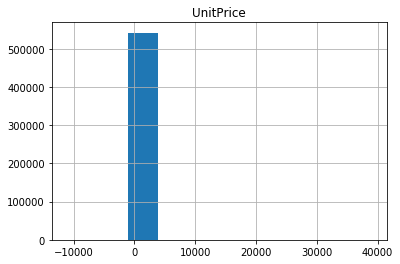

In [4]:
#question 2
#Draw histogram of unitprice field using matplotlib


df.hist(column='UnitPrice')



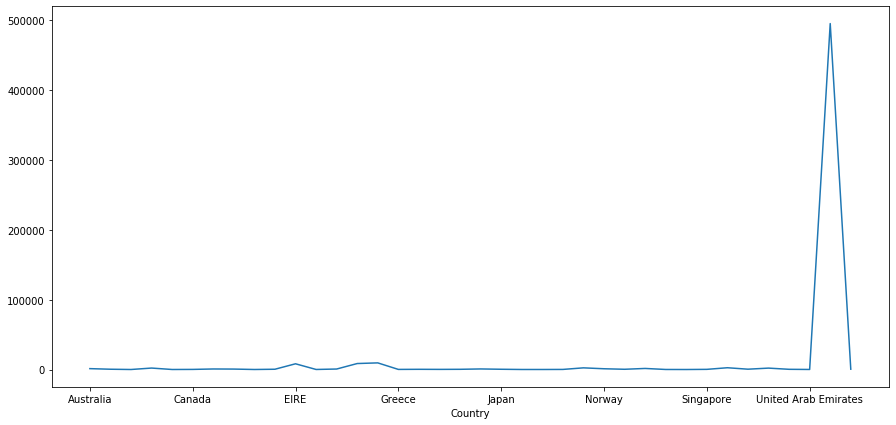

In [36]:
#question 3
#3. Find mean of unitprice group by country and plot them

fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Country']).count()['UnitPrice'].plot(ax=ax)

In [37]:
#question 4
# Find min and max of unit price group by customerID

print(df.groupby('CustomerID', as_index=False)['UnitPrice'].mean().min())
print(df.groupby('CustomerID', as_index=False)['UnitPrice'].mean().max())

CustomerID    12346.0
UnitPrice         0.0
dtype: float64
CustomerID    18287.00
UnitPrice      8055.78
dtype: float64


InvoiceDate
April         493207.121
August        682680.510
December     1182625.030
February      498062.650
January       560000.260
July          681300.111
June          691123.120
March         683267.080
May           723333.510
November     1461756.250
October      1070704.670
September    1019687.622
Name: Product, dtype: float64
#######################################
InvoiceDate
2010    7.489570e+05
2011    8.998791e+06
Name: Product, dtype: float64


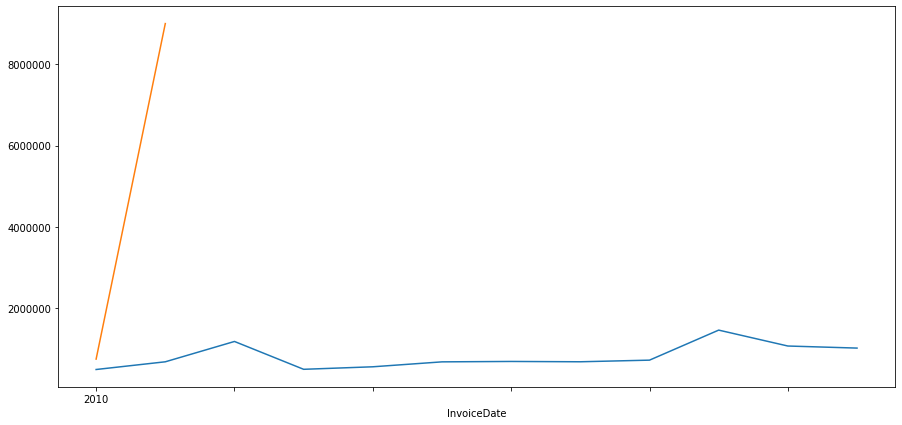

In [38]:
#question 5
#. Find cumulative sales monthly and yearly and plot them

import pandas as pd
import xlrd
import csv
from datetime import datetime


# def csv_from_excel():
#     wb = xlrd.open_workbook('Online_Retail.xlsx')
#     sh = wb.sheet_by_name('Online Retail')
#     your_csv_file = open('data1.csv', 'w')
#     wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
#     wr.writerow(sh.row_values(0))

#     for rownum in range(1, sh.nrows):
#      # date = sh.row_values(rownum)[0]
#      # date = date.split(" ")[0]
#      # date = date.split("/")[1:]
#      year, month, day, hour, minute, sec = xlrd.xldate_as_tuple(int(sh.row_values(rownum)[4]), wb.datemode)
#      py_date = datetime(year, month, day, hour, minute)
#      wr.writerow(sh.row_values(rownum)[:4] + [py_date] + sh.row_values(rownum)[5:])

#     your_csv_file.close()

# csv_from_excel()



df = pd.read_csv("data1.csv", delimiter = ',', header=0)
product = df.UnitPrice * df.Quantity
df["Product"] = product
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

newdf1 = df.groupby(df['InvoiceDate'].dt.strftime('%B'))['Product'].sum()
newdf2 = df.groupby(df['InvoiceDate'].dt.strftime('%Y'))['Product'].sum()
print(newdf1)
print("#######################################")
print(newdf2)

fig, ax = plt.subplots(figsize=(15,7))
newdf1.plot(ax=ax)
newdf2.plot(ax=ax)